In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from helpers.helper_functions import *

In [6]:
import re

# The Significant Bang Theory

Attention, ADA students!

The Sheldon Cooper we all know and love (OK, some of us might not know him, and some might not love him) from the TV series "The Big Bang Theory" has gotten into an argument with Leonard from the same TV show. Sheldon insists that he knows the show better than anyone, and keeps making various claims about the show, which neither of them know how to prove or disprove. The two of them have reached out to you ladies and gentlemen, as data scientists, to help them. You will be given the full script of the series, with information on the episode, the scene, the person saying each dialogue line, and the dialogue lines themselves.

Leonard has challenged several of Sheldon's claims about the show, and throughout this exam you will see some of those and you will get to prove or disprove them, but remember: sometimes, we can neither prove a claim, nor disprove it!

## Deadline
Wednesday, January 30th, 2019; 11:15 A.M. (Swiss time)

_For the deadline for extramural exams, see the submission subsection._

## Important notes
* Don't forget to add a textual description of your thought process, the assumptions you made, and your results!
* Please write all your comments in English, and use meaningful variable names in your code.
* As we have seen during the semester, data science is all about multiple iterations on the same dataset. Do not obsess over small details in the beginning, and try to complete as many tasks as possible during the first 2 hours. Then, go back to the obtained results, write meaningful comments, and debug your code if you have found any glaring mistake.
* Fully read the instructions for each question before starting to solve it to avoid misunderstandings, and remember to save your notebook often!
* The exam contains **15 questions organised into 4 tasks**, and is designed for more than 3 hours. **You do not need to solve everything in order to get a 6**, and you have some freedom is choosing the tasks you wish to solve.
* You cannot leave the room in the first and last 15 minutes.
* You can use all the online resources you want except for communication tools (emails, web chats, forums, phone, etc.). We will be monitoring the network for unusual activity.
* Remember, this is not a homework assignment -- no teamwork allowed!

## Submission
* Your file has to be named as "NameSurname_SCIPER.ipynb".
* Make sure you upload your Jupyter Notebook (1 file) to [this](https://goo.gl/forms/7GLvYl94uSOn54jH2) Google form at the end of the exam, with all the cells already evaluated (except for the Spark-related question, Q7). You need to sign in to Google using your EPFL credentials in order to submit the form.
* In case of problems with the form, send your Jupyter Notebook (along with your name and SCIPER number) as a direct message to @ramtin on Mattermost. This is reserved only for those who encounter problems with the submission -- you need to have a reasonable justification for using this back-up.
* You will have until 11:20 (strict deadline) to turn in your submission. **Late submissions will not be accepted.** This deadline is for the students taking the exam at EPFL -- students taking the exam extramurally will have their submission deadline as the starting time of the exam plus 3 hours and 5 minutes.

## Task A: Picking up the shovel (10 points)

**Note: You will use the data you preprocess in this task in all the subsequent ones.**

Our friends' argument concerns the entire show. We have given you a file in the `data/` folder that contains the script of every single episode. New episodes are indicated by '>>', new scenes by '>', and the rest of the lines are dialogue lines. Some lines are said by multiple people (for example, lines indicated by 'All' or 'Together'); **you must discard these lines**, for the sake of simplicity. However, you do not need to do it for Q1 in this task -- you'll take care of it when you solve Q2.

**Q1**. (5 points) Your first task is to extract all lines of dialogue in each scene and episode, creating a dataframe where each row has the episode and scene where a dialogue line was said, the character who said it, and the line itself. You do not need to extract the proper name of the episode (e.g. episode 1 can appear as "Series 01 Episode 01 - Pilot Episode", and doesn't need to appear as "Pilot Episode"). Then, answer the following question: In total, how many scenes are there in each season? We're not asking about unique scenes; the same location appearing in two episodes counts as two scenes. You can use a Pandas dataframe with a season column and a scene count column as the response.

**Note: The data refers to seasons as "series".**

In [7]:
with open('data/all_scripts.txt', encoding="utf8") as fs:
    script = fs.readlines()

In [8]:
script = [line.strip() for line in script]

In [9]:
lines = []
for line in script:
    if line.startswith('>>'):
        episode = line[3:]
        season = episode[7:9]
        continue
    if line.startswith('>'):
        scene = line[2:]
        continue
    splitting = re.split(': ', line)
    speaker = splitting[0]
    try:
        text = splitting[1]
    except:
        print(line)
        continue
    lines.append({'season': season,
                  'episode': episode,
                  'scene': scene,
                  'speaker': speaker,
                  'text': text})
    
    
data = pd.DataFrame(lines)

Penny:


In [10]:
data

,season,episode,scene,speaker,text
0,01,Series 01 Episode 01 – Pilot Episode,A corridor at a sperm bank.,Sheldon,So if a photon is directed through a plane wit...
1,01,Series 01 Episode 01 – Pilot Episode,A corridor at a sperm bank.,Leonard,"Agreed, what’s your point?"
2,01,Series 01 Episode 01 – Pilot Episode,A corridor at a sperm bank.,Sheldon,"There’s no point, I just think it’s a good ide..."
3,01,Series 01 Episode 01 – Pilot Episode,A corridor at a sperm bank.,Leonard,Excuse me?
4,01,Series 01 Episode 01 – Pilot Episode,A corridor at a sperm bank.,Receptionist,Hang on.
...,...,...,...,...,...
51286,10,Series 10 Episode 24 – The Long Distance Disso...,Sheldon’s office.,Ramona,"Mmm. No big deal, I enjoy spending time with you."
51287,10,Series 10 Episode 24 – The Long Distance Disso...,Sheldon’s office.,Sheldon,"And I with you. Question, are you seeking a ro..."
51288,10,Series 10 Episode 24 – The Long Distance Disso...,Sheldon’s office.,Ramona,What if I were?
51289,10,Series 10 Episode 24 – The Long Distance Disso...,Sheldon’s office.,Sheldon,"Well, that would raise a number of problems. W..."


In [11]:
# Build df of scene counts by episode
scene_by_episode = data.groupby(['season', 'episode']).scene.unique().apply(lambda x: len(x))
scene_by_episode

season  episode                                            
01      Series 01 Episode 01 – Pilot Episode                   12
        Series 01 Episode 02 – The Big Bran Hypothesis         11
        Series 01 Episode 03 – The Fuzzy Boots Corollary       11
        Series 01 Episode 04 – The Luminous Fish Effect        14
        Series 01 Episode 05 – The Hamburger Postulate          8
                                                               ..
10      Series 10 Episode 20 – The Recollection Dissipation     9
        Series 10 Episode 21 – The Separation Agitation         7
        Series 10 Episode 22 – The Cognition Regeneration      10
        Series 10 Episode 23 – The Gyroscopic Collapse          9
        Series 10 Episode 24 – The Long Distance Dissonance     9
Name: scene, Length: 231, dtype: int64

In [12]:
scene_by_episode.groupby('season').sum()

season
01    157
02    205
03    193
04    219
05    198
06    211
07    207
08    191
09    177
10    189
Name: scene, dtype: int64

**Q2**. (5 points) Now, let's define two sets of characters: all the characters, and recurrent characters. Recurrent characters are those who appear in more than one episode. For the subsequent sections, you will need to have a list of recurrent characters. Assume that there are no two _named characters_ (i.e. characters who have actual names and aren't referred to generically as "little girl", "grumpy grandpa", etc.) with the same name, i.e. there are no two Sheldons, etc. Generate a list of recurrent characters who have more than 90 dialogue lines in total, and then take a look at the list you have. If you've done this correctly, you should have a list of 20 names. However, one of these is clearly not a recurrent character. Manually remove that one, and print out your list of recurrent characters. To remove that character, pay attention to the _named character_ assumption we gave you earlier on. **For all the subsequent questions, you must only keep the dialogue lines said by the recurrent characters in your list.**

_Hint: "I know all the recurrent characters because I've watched the entire series five times" is not an acceptable argument, so you need to actually generate the list._

In [13]:
# List of characters appearing in each episode
char_by_episode = data.groupby('episode').speaker.unique()
char_by_episode

episode
Series 01 Episode 01 – Pilot Episode                   [Sheldon, Leonard, Receptionist, Penny, Howard...
Series 01 Episode 02 – The Big Bran Hypothesis                    [Leonard, Howard, Sheldon, Raj, Penny]
Series 01 Episode 03 – The Fuzzy Boots Corollary       [Howard, Sheldon, Raj, Leonard, Penny, Lesley,...
Series 01 Episode 04 – The Luminous Fish Effect        [Sheldon, Leonard, Raj, Howard, Summer, Gableh...
Series 01 Episode 05 – The Hamburger Postulate            [Sheldon, Howard, Leonard, Raj, Penny, Lesley]
                                                                             ...                        
Series 10 Episode 20 – The Recollection Dissipation    [Penny, Leonard, Amy, Raj, Sheldon, Howard, St...
Series 10 Episode 21 – The Separation Agitation        [Sheldon, Amy, Together, Howard, Raj, Leonard,...
Series 10 Episode 22 – The Cognition Regeneration      [Leonard, Howard, Raj, Sheldon, Penny, Bernade...
Series 10 Episode 23 – The Gyroscopic Collapse 

In [14]:
# Number of episodes in which each character appears
char_nepisodes = dict(zip(*np.unique(np.concatenate(char_by_episode.values), return_counts=True)))
list(char_nepisodes.items())[:10]

[('Abby', 1),
 ('Actress', 1),
 ('Adam', 2),
 ('Air Force Officer', 1),
 ('Alex', 4),
 ('Alfred', 2),
 ('Alice', 1),
 ('Alicia', 1),
 ('All', 40),
 ('Amelia', 1)]

In [15]:
# Characters appearing in more than one episode
recurrent_chars = np.array([k for k, v in char_nepisodes.items() if v > 1])
recurrent_chars

array(['Adam', 'Alex', 'Alfred', 'All', 'Amy', 'Arthur', 'Assistant',
       'Barman', 'Barry', 'Bernadette', 'Bert', 'Beverley', 'Beverly',
       'Both', 'Claire', 'Col. Williams', 'Colonel Williams', 'Dan',
       'Dave', 'Dimitri', 'Doctor', 'Emily', 'Everyone', 'Female Voice',
       'Gablehauser', 'Gablehouser', 'Girl', 'Girls', 'Guy', 'Howard',
       'Howard and Bernadette', 'Howard and Raj', 'Howard’s Mother',
       'Ira', 'Janine', 'Katee Sackhoff', 'Kevin', 'Kripke', 'Kurt',
       'LeVar', 'Leonard', 'Leonard and Howard', 'Lesley', 'Leslie',
       'Lucy', 'Man', 'Man on TV', 'Mary', 'Mike', 'Mr Rostenkowski',
       'Mr. Rostenkowski', 'Mrs Cooper', 'Mrs Davis', 'Mrs Hofstadter',
       'Mrs Koothrappali', 'Mrs Wolowitz', 'Nurse', 'Penny',
       'Penny’s Dad', 'Policeman', 'Priya', 'Raj', 'Ramona',
       'Receptionist', 'Santa', 'Security Guard', 'Seibert', 'Sheldon',
       'Siri', 'Spock', 'Steph', 'Stephen Hawking', 'Stuart', 'Summer',
       'Together', 'Voice', 'Wa

In [16]:
# Number of lines belonging to each character
nlines_by_char = data.groupby('speaker').text.count()

In [248]:
prolific_chars = nlines_by_char[nlines_by_char > 90].index
prolific_chars

Index(['Amy', 'Arthur', 'Bernadette', 'Bert', 'Beverley', 'Emily', 'Howard',
       'Kripke', 'Leonard', 'Leslie', 'Man', 'Mrs Cooper', 'Mrs Wolowitz',
       'Penny', 'Priya', 'Raj', 'Sheldon', 'Stuart', 'Wil', 'Zack'],
      dtype='object', name='speaker')

In [249]:
# Intersection of characters appearing in more than one episode and with more than 90 lines
recurrent_prolific_chars = np.array(list(set(recurrent_chars) & set(prolific_chars)))
recurrent_prolific_chars

array(['Mrs Cooper', 'Kripke', 'Leslie', 'Amy', 'Leonard', 'Sheldon',
       'Howard', 'Stuart', 'Zack', 'Priya', 'Bert', 'Penny', 'Bernadette',
       'Arthur', 'Raj', 'Man', 'Emily', 'Mrs Wolowitz', 'Beverley', 'Wil'],
      dtype='<U12')

In [256]:
len(recurrent_prolific_chars)

19

Based on our definition of characters, 'Man' is clearly not admissible, hence must be manually removed.

In [255]:
recurrent_prolific_chars = np.delete(recurrent_prolific_chars, np.where(recurrent_prolific_chars=='Man'))

In [257]:
data_rec = data[data.speaker.isin(recurrent_prolific_chars)].copy()

## Task B: Read the ~~stats~~ scripts carefully (30 points)

### Part 1: Don't put the shovel down just yet

**Q3**. (2.5 points) From each dialogue line, replace punctuation marks (listed in the EXCLUDE_CHARS variable provided in `helpers/helper_functions.py`) with whitespaces, and lowercase all the text. **Do not remove any stopwords, leave them be for all the questions in this task.**

In [22]:
dataB = data_rec.copy()

In [23]:
from string import punctuation

EXCLUDE_CHARS = set(punctuation).union(set('’'))

In [24]:
dataB.text = dataB.text.apply(lambda s: ''.join([char.lower() if char not in EXCLUDE_CHARS else ' ' for char in s]))

In [25]:
dataB.text

0        so if a photon is directed through a plane wit...
1                               agreed  what s your point 
2        there s no point  i just think it s a good ide...
3                                               excuse me 
5        one across is aegean  eight down is nabakov  t...
                               ...                        
51283    uh  breakfast yes  lunch no  i did have a coug...
51285                           how thoughtful  thank you 
51287    and i with you  question  are you seeking a ro...
51289    well  that would raise a number of problems  w...
51290     knock  knock  knock  amy   knock  knock  knoc...
Name: text, Length: 48324, dtype: object

**Q4**. (5 points) For each term, calculate its "corpus frequency", i.e. its number of occurrences in the entire series. Visualize the distribution of corpus frequency using a histogram. Explain your observations. What are the appropriate x and y scales for this plot?

In [26]:
from collections import Counter
import seaborn as sns
from operator import itemgetter

In [27]:
full_text = ' '.join(dataB.text.values)

In [28]:
# Count number of occurrences for each term
word_frequencies = Counter(full_text.split(' '))
list(word_frequencies.items())[:10]

[('so', 3182),
 ('if', 2484),
 ('a', 13488),
 ('photon', 4),
 ('is', 5427),
 ('directed', 3),
 ('through', 276),
 ('plane', 25),
 ('with', 3937),
 ('two', 701)]

In [29]:
frequencies = list(word_frequencies.values())

In [30]:
histvalues = sorted(Counter(frequencies).items(), key=itemgetter(1), reverse=True)
histx, histy = list(zip(*histvalues))

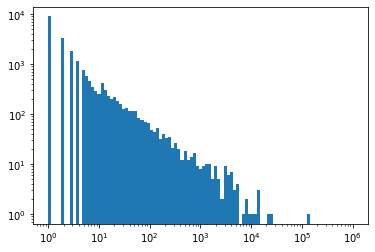

In [31]:
plt.hist(frequencies, bins=np.logspace(0, 6, 100), log=True);
plt.xscale('log')

The appropriate scale is loglog. We are observing a power low, which is typical for word occurrences.

### Part 2: Talkativity
**Q5**. (2.5 points) For each of the recurrent characters, calculate their total number of words uttered across all episodes. Based on this, who seems to be the most talkative character?

In [32]:
# add a new column with the number of words per line
dataB['nwords'] = dataB.text.apply(lambda x: len(x.split(' ')))

In [33]:
words_by_speaker = dataB.groupby('speaker').nwords.sum().sort_values(ascending=False)
words_by_speaker

speaker
Sheldon         222487
Leonard         125874
Penny            99459
Howard           84378
Raj              72941
Amy              47929
Bernadette       33489
Stuart            9769
Mrs Cooper        4060
Beverley          2447
Priya             2424
Arthur            1933
Emily             1930
Zack              1775
Mrs Wolowitz      1757
Man               1552
Leslie            1541
Kripke            1538
Bert              1407
Name: nwords, dtype: int64

The most talkative character seems to be Sheldon! (unsurprisingly...)

**Q6**. (12.5 points) For each of the recurrent characters, calculate their total number of words uttered per episode (ignoring episodes that the character does not appear in), and calculate a **robust summary statistic** for the word count distribution of each person.

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**i)** (2.5 points) What changes do you observe, compared to the analysis in Q5?

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**ii)** (2.5 points) Why is this analysis an improvement over the previous one, and how could you improve it even further? _Hint: The improvement involves making your unit for word counts even more granular - you can go further down than episodes._

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**iii)** (7.5 points) Incorporate that improvement. Do you still see the same results? How **confident** can you be that the "most talkative" person given by this twice improved method is really more talkative than the second most talkative one? _Hint: Read the question again. A good idea would be to use bootstrapping and calculate your summary statistic on each bootstrapped set._

In [34]:
words_by_char_episode = dataB.groupby(['speaker', 'episode']).nwords.sum()
words_by_char_episode

speaker  episode                                            
Amy      Series 03 Episode 23 – The Lunar Excitation            120
         Series 04 Episode 01 – The Robotic Manipulation        170
         Series 04 Episode 03 – The Zazzy Substitution          566
         Series 04 Episode 05 – The Desperation Emanation       274
         Series 04 Episode 08 – The 21 Second Excitation        716
                                                               ... 
Zack     Series 04 Episode 17 – The Toast Derivation            196
         Series 07 Episode 09 – The Thanksgiving Decoupling     151
         Series 07 Episode 11 – The Cooper Extraction            24
         Series 09 Episode 22 – The Fermentation Bifurcation    266
         Series 10 Episode 22 – The Cognition Regeneration      347
Name: nwords, Length: 1651, dtype: int64

In [35]:
words_by_char_episode.groupby('speaker').median().sort_values(ascending=False)

speaker
Sheldon         936.0
Leonard         486.0
Arthur          437.5
Penny           402.0
Mrs Cooper      356.5
Howard          352.0
Amy             278.0
Raj             267.5
Bert            245.5
Beverley        226.0
Kripke          197.5
Bernadette      193.0
Priya           182.0
Zack            173.5
Stuart          142.0
Leslie          139.0
Emily           109.0
Mrs Wolowitz     49.0
Man              15.5
Name: nwords, dtype: float64

With respect to Q5 we observe significant differences in the order, with characters such as Arthur or Bert which previously were at the bottom of the list now in much higher positions, or viceversa others such as Bernadette which lost positions. Note that the summary statistic used is the median, which is robust to eventual outliers.

The improvement is due to the fact that we are considering single episodes instead of aggregating between all of them. In fact, aggregating over all episodes is privileging characters that appear in a lot of episodes, but potentially saying very little in each episode. Instead, considering single episodes allows us to evaluate talkativeness proportionally to how much a character appeared in the show. Continuing further in this direction, we could consider the distribution over single scenes instead of aggregating all of them within each episode.

In [36]:
import scipy.stats

In [37]:
words_by_char_scene = dataB.groupby(['speaker', 'episode', 'scene']).nwords.sum()

In [38]:
# Compute medians
words_by_char_scene_medians = pd.DataFrame(words_by_char_scene.groupby('speaker').median()).rename({'nwords': 'median'})

In [39]:
# Compute bootstrapped medians
words_by_char_scene_medians['bootstrap'] = words_by_char_scene.groupby('speaker').apply(
    lambda x: scipy.stats.bootstrap([x.values], method='percentile',
                                    statistic=np.median, confidence_level=0.95).confidence_interval)

In [40]:
words_by_char_scene_medians.sort_values(by='nwords', ascending=False)

,nwords,bootstrap
speaker,,
Mrs Cooper,155.0,"(97.0, 197.0)"
Arthur,150.5,"(101.0, 257.0)"
Sheldon,140.0,"(133.0, 148.0)"
Beverley,127.0,"(60.0, 201.0)"
Bert,106.0,"(49.0, 143.0)"
Penny,87.0,"(82.0, 96.0)"
Leonard,82.0,"(77.0, 88.0)"
Amy,78.0,"(69.0, 89.0)"
Zack,78.0,"(42.5, 106.5)"


Again, considering single scene changed significantly our results, and now Mrs Cooper and Arthur are on top. However, we see that 95% confidence intervals of the most talkative characters are hugely overlapping, hence with this approach we cannot establish in a statistically significant way who is the single most talkative character.

### Part 3: Obligatory Spark cameo
**Q7**. (7.5 points) Write a Spark script that does the following: Given the raw input file and your list of recurrent characters, create an RDD containing (speaker, dialogue line) rows **only for the recurrent characters** (assume that you already have the list --  no need to calculate it using Spark), and then generate a vectorized bag of words representation for each dialogue line, thus generating an RDD with (speaker, bag of words vector) rows. Then, calculate an aggregated bag of words vector (sum of all vectors) for each person. The final output is therefore an RDD with each of its rows being (speaker, aggregated bag of words vector). For your bag of words vectors, you can use $1\times|V|$ scipy CSR matrices (where $|V|$ is the size of the vocabulary). No filtering of the vocabulary is necessary for this part.

You do not need to run this script, but you do need to use Spark logic and also, the syntax needs to be correct.

In [333]:
from pyspark.sql import *
from pyspark.sql.functions import *
from pyspark import SparkContext

In [334]:
# create the session
spark = SparkSession.builder.getOrCreate()

# create the context
sc = spark.sparkContext

## Task C: The Gossip Graph (30 points)

**Note: Only for this task, discard the recurrent characters whose names are not single words, e.g. Mrs. Cooper.**

Let us define _gossip_ as follows: if a dialogue line of character A mentions B by name in a scene that does not involve character B, we say that “A gossips about B” in that line. Multiple mentions of the same person in a single line are counted once, but a character can gossip about several others in the same line. For the sake of simplicity, we only consider gossips where the name of the recurrent character is mentioned as it appears in our list of characters; for example, if someone says "Cooper" and they mean Sheldon, we discard that.

**Q8**. (12.5 points) Create the two following graphs first:

1. (5 points) Create the _familiarity graph_, an undirected weighted graph, in which there is a node for each recurrent character, and an edge between two characters if they appear together in at least one scene. The weight of the edge between them is the number of scenes they appear in together. If an edge exists between two people in the familiarity graph, we say that they "know each other".
2. (7.5 points) Create the _gossip graph_, which is a directed weighted graph, in which there there is a node for each recurrent character, and a directed edge from the node for A to the node for B if A has gossiped about B at least once. The weight of the edge is the number of scenes in which A has gossiped about B.

_Hint: You can create each graph first as an adjacency matrix and then create a networkx graph out of that._

In [258]:
dataC = data_rec.copy()

In [259]:
recurrent_prolific_chars_1word = [char for char in recurrent_prolific_chars if len(char.split(' ')) == 1]

In [260]:
# Keep only recurrent character whose name is one word only
dataC = dataC[dataC.speaker.isin(recurrent_prolific_chars_1word)]

In [261]:
# List of unique speakers for each scene
speakers_by_scene = dataC.groupby(['episode', 'scene']).speaker.unique()

In [262]:
# Initialize dict of character -> dict of character -> number of scenes in which they appear toghether
familiarity = {char: {char_: 0 for char_ in recurrent_prolific_chars_1word if char_ is not char} for char in recurrent_prolific_chars_1word}

# Populate the counts
for scene_speakers in speakers_by_scene:
    for i, speaker1 in enumerate(scene_speakers):
        for speaker2 in scene_speakers[i+1:]:
            familiarity[speaker1][speaker2] += 1
            familiarity[speaker2][speaker1] += 1 # not really necessary since it's an undirected graph

In [263]:
# Convert dictionary to edges representation, removing empty edges
familiarity_edges = [(s1, s2, w) for s1, values in familiarity.items() for s2, w in values.items() if w>0]
familiarity_edges[:10]

[('Kripke', 'Amy', 1),
 ('Kripke', 'Leonard', 14),
 ('Kripke', 'Sheldon', 18),
 ('Kripke', 'Howard', 9),
 ('Kripke', 'Stuart', 2),
 ('Kripke', 'Penny', 1),
 ('Kripke', 'Raj', 12),
 ('Kripke', 'Wil', 2),
 ('Leslie', 'Amy', 1),
 ('Leslie', 'Leonard', 14)]

In [264]:
import networkx as nx

In [265]:
G_familiarity = nx.Graph()
G_familiarity.add_weighted_edges_from(familiarity_edges)

In [266]:
gossip = {}

# Create a episode-scene list
scenes_list = list(map(lambda x: ''.join(x), dataC[['episode', 'scene']].values))

for character in recurrent_prolific_chars_1word:
    
    # Get a list of all scenes in which character appears
    is_appearing = speakers_by_scene.apply(lambda x: character in x)
    scenes_appearing = list(map(lambda x: ''.join(x), is_appearing[is_appearing].index))
    
    # Create masking
    mask = list(map(lambda x: x not in scenes_appearing, scenes_list))
    
    df_gossip = dataC[mask]
    
    groups = df_gossip.groupby(['episode', 'scene', 'speaker'])

    # list of speaker -> number of times character gossiped about speaker
    gossiped = groups.text.apply(lambda x: character in ' '.join(x)).groupby('speaker').sum()
    gossip[character] = gossiped.to_dict()

In [267]:
# Convert dictionary to edges representation, removing empty edges
gossip_edges = [(s1, s2, w) for s1, values in gossip.items() for s2, w in values.items() if w>0]
gossip_edges[:10]

[('Kripke', 'Amy', 3),
 ('Kripke', 'Howard', 1),
 ('Kripke', 'Leonard', 5),
 ('Kripke', 'Penny', 1),
 ('Kripke', 'Raj', 2),
 ('Kripke', 'Sheldon', 12),
 ('Leslie', 'Howard', 3),
 ('Leslie', 'Leonard', 2),
 ('Leslie', 'Penny', 1),
 ('Leslie', 'Raj', 1)]

In [268]:
G_gossip = nx.DiGraph()
G_gossip.add_weighted_edges_from(gossip_edges)

Now, answer the following questions:

**Q9**. (5 points) Sheldon claims that every character in the show is familiar with everyone else through at most one intermediary. Based on the familiarity graph, is this true? If not, at most how many intermediaries are needed?

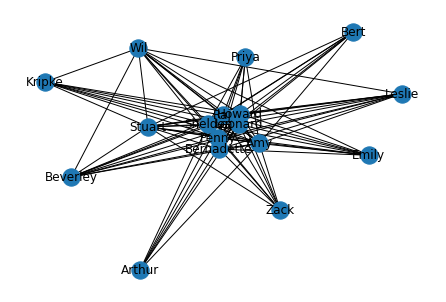

In [269]:
nx.draw_spring(G_familiarity, with_labels=True)

In [270]:
nx.is_connected(G_familiarity)

True

In [271]:
nx.diameter(G_familiarity)

2

Sheldon is (as always) right! The graph is connected with diameter 2, hence the longest shortest path between any two characters involves one intermediate.

**Q10**. (5 points) Who is the character through whom the largest number of these indirect familiarities happen? Calculate an appropriate centrality metric on the familiarity graph to answer this question. You can use the package networkx for this section.

In [272]:
betweenness = nx.betweenness_centrality(G_familiarity)

In [273]:
from operator import itemgetter

In [274]:
sorted(betweenness.items(), key=itemgetter(1), reverse=True)

[('Amy', 0.04351851851851851),
 ('Leonard', 0.04351851851851851),
 ('Sheldon', 0.04351851851851851),
 ('Howard', 0.04351851851851851),
 ('Penny', 0.04351851851851851),
 ('Raj', 0.04351851851851851),
 ('Stuart', 0.019708994708994704),
 ('Bernadette', 0.01316137566137566),
 ('Wil', 0.006018518518518519),
 ('Kripke', 0.0),
 ('Leslie', 0.0),
 ('Beverley', 0.0),
 ('Zack', 0.0),
 ('Priya', 0.0),
 ('Bert', 0.0),
 ('Arthur', 0.0),
 ('Emily', 0.0)]

The appropriate metric is betweenness centrality, measuring the number of shortest paths passing through each node. There is an ex-aequo for the character trough whom the largest number of indirect familiarities happen, between Amy, Leonard, Sheldon, Howard, Penny and Raj.

**Q11**. (2.5 points) Another claim of Sheldon's is that every recurrent character in the show gossips about all the other recurrent characters. What property of the gossip graph would correspond to this? Does the gossip graph possess that property? If not, then is it the case that for every pair of recurrent characters, at least one gossips about the other? What property would this correspond to?

The property corresponding to Sheldon's claim is completeness, that is if the graph has an edge between every ordered pair of characters.

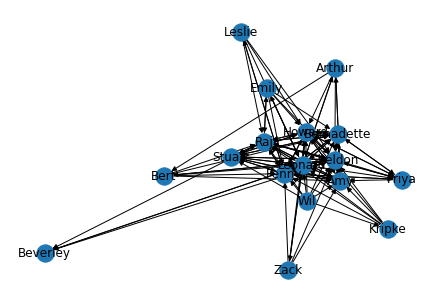

In [275]:
nx.draw_spring(G_gossip, with_labels=True)

In [279]:
nedges = len(G_gossip.edges)
nnodes = len(G_gossip.nodes)

print(f'The gossip graph has {nnodes} nodes and {nedges} edges. To be complete, it would need {nnodes*(nnodes-1)} edges.')

The gossip graph has 17 nodes and 120 edges. To be complete, it would need 272 edges.


The graph is not complete, and the property is not satisfied. The second claim corresponds to the completeness of the underlying undirected graph. 

In [281]:
G_gossip_undir = G_gossip.to_undirected()

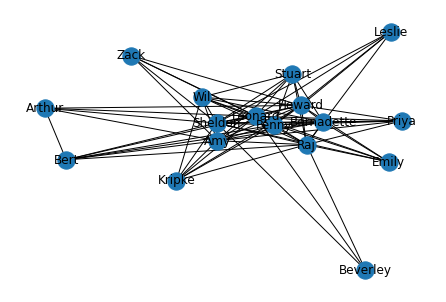

In [285]:
nx.draw_spring(G_gossip_undir, with_labels=True)

In [283]:
nedges = len(G_gossip_undir.edges)
nnodes = len(G_gossip_undir.nodes)

print(f'The undirected gossip graph has {nnodes} nodes and {nedges} edges. To be complete, it would need {nnodes*(nnodes-1)/2} edges.')

The undirected gossip graph has 17 nodes and 80 edges. To be complete, it would need 136.0 edges.


Still, the graph is not complete and the property is thus not respected.

**Q12**. (5 points) Use the gossip graph and the familiarity graph to figure out if for every pair of recurrent characters, one of them has gossiped about the other if and only if they know each other. Explain your method - the simpler, the better.

We need to check if, for every edge of G_gossip_undir, there is a corresponding edge in G_familiarity. To do so, we can create a set of all the edges in G_familiarity and a set of all the edges in G_gossip_undir, and compute their intersection. If the number of elements in the intersection is the same as the number of edges in G_gossip_undir, the claim is true.

In [315]:
gossip_undir_edges = set(map(lambda x: frozenset(x), G_gossip_undir.edges)) 
gossip_familiarity = set(map(lambda x: frozenset(x), G_familiarity.edges)) 

In [317]:
edges_intersection = gossip_familiarity.intersection(gossip_undir_edges)

In [319]:
print(f'The number of intersecting edges is {len(edges_intersection)}, the number of original gossiping edges is {len(gossip_undir_edges)}')

The number of intersecting edges is 78, the number of original gossiping edges is 80


Therefore, it does exist at least one pair of characters such that they don't know each other but at least one of them gossiped about the other.

In [321]:
gossip_undir_edges.difference(edges_intersection)

{frozenset({'Arthur', 'Bert'}), frozenset({'Bernadette', 'Bert'})}

In [330]:
familiarity['Bert']['Bernadette']

0

In [331]:
gossip['Bert']['Bernadette']

1

An example of such pair are Bernadetet and Bert.

## Task D: The Detective's Hat (30 points)

Sheldon claims that given a dialogue line, he can, with an accuracy of above 70%, say whether it's by himself or by someone else. Leonard contests this claim, since he believes that this claimed accuracy is too high. Leonard also suspects that it's easier for Sheldon to distinguish the lines that _aren't_ his, rather than those that _are_. We want you to put on the (proverbial) detective's hat and to investigate this claim.

**Q13**. (7.5 points) Divide the set of all dialogue lines into two subsets: the training set, consisting of all the seasons except the last two, and the test set, consisting of the last two seasons. Each of your data points (which is one row of your matrix) is one **dialogue line**. Now, use the scikit-learn class **TfIdfVectorizer** to create TF-IDF representations for the data points in your training and test sets. Note that since you're going to train a machine learning model, everything used in the training needs to be independent of the test set. As a preprocessing step, remove stopwords and words that appear only once from your vocabulary. Use the simple tokenizer provided in `helpers/helper_functions.py` as an input to the TfidfVectorizer class, and use the words provided in `helpers/stopwords.txt` as your stopwords.

In [332]:
dataD = data_rec.copy()

In [337]:
data_train = dataD[dataD.season.astype(int) < 9]
data_test = dataD[dataD.season.astype(int) >= 9]

In [338]:
import sklearn.feature_extraction

In [346]:
def simple_tokeniser(text):
    return text.split()

In [357]:
with open('helpers/stopwords.txt') as fs:
    stopwords = fs.read().splitlines()

stopwords[:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', 'your']

In [542]:
vectorizer = sklearn.feature_extraction.text.TfidfVectorizer(tokenizer=simple_tokeniser, stop_words=stopwords, min_df=2)
X_train = vectorizer.fit_transform(data_train.text.values)
X_test = vectorizer.transform(data_test.text.values)

y_train = (data_train.speaker == 'Sheldon').values.astype(int)
y_test = (data_test.speaker == 'Sheldon').values.astype(int)

**Q14**. (5 points) Find the set of all words in the training set that are only uttered by Sheldon. Is it possible for Sheldon to identify himself only based on these? Use the test set to assess this possibility, and explain your method.

In [423]:
# Set of all words uttered by Sheldon and by all other characters
words_by_sheldon = set((' '.join(data_train[data_train.speaker == 'Sheldon'].text.values)).split())
words_by_others = set((' '.join(data_train[data_train.speaker != 'Sheldon'].text.values)).split())

# Set of words only uttered by Sheldon
words_by_sheldon_only = words_by_sheldon.difference(words_by_others)

In [424]:
# Predict that a quote is by Sheldon if in its text appears any word uttered only by Sheldon
y_pred = data_test.text.apply(lambda x: np.any([word in words_by_sheldon_only for word in x.split()])).values.astype(int)

In [425]:
import sklearn.metrics

In [426]:
sklearn.metrics.accuracy_score(y_test, y_pred)

0.7626118595732128

In [427]:
sklearn.metrics.confusion_matrix(y_test, y_pred)

array([[7310,  622],
       [1792,  445]], dtype=int64)

Apparently, it is possible with a high accuracy (0.76) to identify Sheldon quotes just by this simple method.

**Q15**. (17.5 points) Now, perform singular value decomposition (SVD) on the training TF-IDF matrix, and calculate a **25-dimensional approximation** for both the training and test TF-IDF matrices (you can do this using scikit-learn's **TruncatedSVD** class). Then, train a logistic regression classifier with 10-fold cross-validation (using the scikit-learn **LogisticRegressionCV** class) on the output of the SVD that given a dialogue line, tells you whether it's by Sheldon or by someone else.

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**i)** (7.5 points) Report precision, recall and F1-score for both classes (Sheldon and not-Sheldon), as well as accuracy, of your classifier on the training set and the test set. You need to implement the calculation of the evaluation measures (precision, etc.) yourself -- using the scikit-learn functions for them is not allowed.

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**ii)** (5 points) What difference do you observe between the model's scores on the training and test sets? What could you infer from the amount of difference you see? What about the difference between scores on the two classes? Given the performance of your classifier, is Leonard right that the accuracy Sheldon claims is unattainable? What about his suspicions about the lines that Sheldon can and cannot distinguish?
    
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**iii)** (2.5 points) List 10 of the most extreme false positives and 10 of the most extreme false negatives, in terms of the probabilities predicted by the logistic regression model. What are common features of false positives? What about the false negatives?
    
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**iv)** (2.5 points) What is the most important feature in the model? What are the 5 most important words in this feature? _Hint: Think of the definition of an SVD, and that you did an SVD on the TF-IDF matrix with dialogue lines as rows and words as columns. You have projected the original data points onto a 25-dimensional subspace -- you need to look at the unit vectors you used for the projection._

In [516]:
import sklearn.decomposition
import sklearn.linear_model

In [543]:
svd = sklearn.decomposition.TruncatedSVD(n_components=25, random_state=42)

X_train_svd = svd.fit_transform(X_train)
X_test_svd = svd.transform(X_test)

In [544]:
model = sklearn.linear_model.LogisticRegressionCV(cv=10)

In [545]:
model.fit(X_train_svd, y_train)

LogisticRegressionCV(cv=10)

In [546]:
y_pred_train = model.predict(X_train_svd)

In [547]:
y_pred = model.predict(X_test_svd)

In [548]:
def compute_confusion_matrix(true_label, predict_label):#prediction_proba, decision_threshold=0.5): 
    
    # predict_label = (prediction_proba[:,1]>decision_threshold).astype(int)   
                                                                                                                       
    TP = np.sum(np.logical_and(predict_label==1, true_label==1))
    TN = np.sum(np.logical_and(predict_label==0, true_label==0))
    FP = np.sum(np.logical_and(predict_label==1, true_label==0))
    FN = np.sum(np.logical_and(predict_label==0, true_label==1))
    
    confusion_matrix = np.asarray([[TP, FP],
                                    [FN, TN]])
    return confusion_matrix


def compute_all_score(confusion_matrix, t=0.5):
    [[TP, FP],[FN, TN]] = confusion_matrix.astype(float)
    
    accuracy =  (TP+TN)/np.sum(confusion_matrix)
    
    precision_positive = TP/(TP+FP) if (TP+FP) !=0 else np.nan
    precision_negative = TN/(TN+FN) if (TN+FN) !=0 else np.nan
    
    recall_positive = TP/(TP+FN) if (TP+FN) !=0 else np.nan
    recall_negative = TN/(TN+FP) if (TN+FP) !=0 else np.nan

    F1_score_positive = 2 *(precision_positive*recall_positive)/(precision_positive+recall_positive) if (precision_positive+recall_positive) !=0 else np.nan
    F1_score_negative = 2 *(precision_negative*recall_negative)/(precision_negative+recall_negative) if (precision_negative+recall_negative) !=0 else np.nan

    return [accuracy, precision_positive, recall_positive, F1_score_positive, precision_negative, recall_negative, F1_score_negative]

In [549]:
compute_all_score(compute_confusion_matrix(y_train, y_pred_train))

[0.7524098910310143,
 nan,
 0.0,
 nan,
 0.7524098910310143,
 1.0,
 0.8587144992526158]

In [550]:
compute_all_score(compute_confusion_matrix(y_test, y_pred))

[0.7800177008555413,
 nan,
 0.0,
 nan,
 0.7800177008555413,
 1.0,
 0.8764156676426716]

In [514]:
print(sklearn.metrics.classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           0       0.75      1.00      0.86     28724
           1       0.00      0.00      0.00      9452

    accuracy                           0.75     38176
   macro avg       0.38      0.50      0.43     38176
weighted avg       0.57      0.75      0.65     38176



C:\Users\franc\ProgramsAltri\anaconda3\envs\adaexam\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\franc\ProgramsAltri\anaconda3\envs\adaexam\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\franc\ProgramsAltri\anaconda3\envs\adaexam\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

In [469]:
print(sklearn.metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.95      0.88      7932
           1       0.55      0.22      0.32      2237

    accuracy                           0.79     10169
   macro avg       0.68      0.59      0.60     10169
weighted avg       0.75      0.79      0.75     10169



In [471]:
yprob = model.predict_proba(X_test)

In [478]:
false_positives = np.logical_and(y_pred==1, y_test==0)
false_negatives = np.logical_and(y_pred==0, y_test==1)

In [489]:
extreme_FP = np.argsort(-yprob[false_positives][:, 1])[:10]
extreme_FN = np.argsort(-yprob[false_negatives][:, 0])[:10]

In [493]:
X_test[extreme_FP].todense()

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])